Testing Playground

In [82]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pickle
import numpy as np
from matplotlib import pyplot as plt
from universal_portfolio import universal_portfolio
from ftl import ftl
from ftrl import ftrl
from ogd import ogd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# intialization
dict = pickle.load(open('../data/stock_data.pickle', 'rb'))
stock_tickers = ['GOOGL', 'NKE', 'AAPL', 'C', 'GS', 'QCOM', 'FB', 'TSLA', 'DD', 'NFLX']
n = len(stock_tickers)
data = []
prev_price = [dict[i]['price'][0] for i in stock_tickers]
for j in range(len(dict['GOOGL']['price'])):
    curr_time_step = []
    for i in range(n):
        stock = stock_tickers[i]
        curr_time_step.append(dict[stock]['price'][j] / prev_price[i])
        prev_price[i] = dict[stock]['price'][j]
    data.append(curr_time_step)
data = np.array(data)
# data = np.array([[2,0.5],[0.5,2],[2,0.5],[0.5,2],[2,0.5],[0.5,2]])
up = universal_portfolio(n)
follow_leader = ftl(n)
follow_regularized = ftrl(n, 7)
online_gradient = ogd(n, 5)

In [96]:
up_performance = up.ingest(data)

In [97]:
ftl_performance = follow_leader.ingest(data)

In [98]:
ftrl_performance = follow_regularized.ingest(data)

In [94]:
ogd_performance = online_gradient.ingest(data)

In [99]:
# for i in range(len(up.stock_values)):
    # for j in range(len(up.stock_values[i])):
        # if up.stock_values[i][j] != follow_leader.stock_values[i][j]:
            # print(i)
            


print(str(len(up.stock_values)) + '\n')
print(str(len(follow_leader.stock_values)) + '\n')
print(str(len(follow_regularized.stock_values)) + '\n')
print(str(len(online_gradient.stock_values)) + '\n')

257

257

257

257



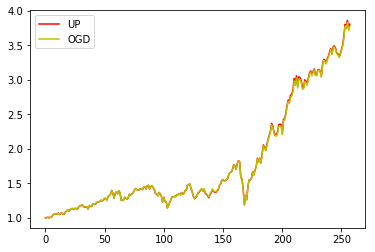

In [102]:
# graphing
x = [i for i in range(len(data) + 1)]
plt.plot(x, up_performance.wealth, 'r', label='UP')
plt.plot(x, ftl_performance.wealth, 'b', label='FTL')
plt.plot(x, ftrl_performance.wealth, 'g', label='FTRL')
plt.plot(x, ogd_performance.wealth, 'y', label='OGD')
plt.legend(loc='upper left')
plt.show()
